<a href="https://colab.research.google.com/github/bruluc81/AIML-Primary/blob/master/Project_3_Bruno_Suresh_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Summary
The data is related with direct marketing campaigns of a
Portuguese banking institution. The marketing campaigns
were based on phone calls. Often, more than one contact to
the same client was required, in order to access if the product
(bank term deposit) would be ('yes') or not ('no') subscribed.

## Visual Data Analysis using Excel
1. 45211 rows and 17 columns with the last column as Target Variable. 
2. Age: Age ranges from 18 to 95 years.  There are no null values
3. Job: 12 Job descriptions given including unknown (288 entries).
4. Marital: 3 Marital status with Divorced which includes widowed.
5. Education: 4 education categories with1857 categorized as unknown
6. Default: Yes/No Type. 815 Credit defaulters with no null values
7. Balance: Balance ranges from approx -8K to +100K 
8. Housing and Loan: Yes/No Type. Around 55% of the respondents have taken housing loan and 15% have taken personal loan.
9. Day / Month / Duration: Contact details are either Cellular or Telephone. Around 13K records are marked as unknown.  Date and month are added as seperate columns.
10.  Duration: Duration of the call ranges from 0 secs to 1 hour.
11.  Campaign: Number of contacts performed ranges from 1 thru 63 contacts per respondent.
12.  pDays: Values ranges from -1 thru 850.  There are 12K records of -1 which seems to be incorrect as this is related to number of days that have passed by.  Need to check this.
13. Previous:  Prior contacts for other campaigns ranges from 0 to 275 with 275 as a single entry.
14. POutcome: 82% of previous outcome is unknown.
15. Target:  Yes/No Type. Around 73% of the respondednt did not take the term deposit.

## 1. Import the necessary libraries

In [0]:
# Display Plots or Graphs as required immediately without show() function. 
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression # Import Logistics Regression machine learning library
from sklearn.utils import resample # for resampling in case of down / up sampling requirements
from sklearn.model_selection import train_test_split # Used to split the data into Training and Testing split
from sklearn.neighbors import KNeighborsClassifier #Importing KNN Classifiers 
from sklearn import metrics # calculate accuracy measures and confusion matrix
from sklearn.naive_bayes import GaussianNB # Naive Bayes package from the Library
from sklearn.ensemble import RandomForestClassifier # Random Forest Package
from sklearn.tree import DecisionTreeClassifier # Decision Tree Package
from sklearn.svm import SVC # Support Vector Classifier Package
from sklearn.metrics import roc_curve, auc # to measure the optimal method
from sklearn.metrics import roc_auc_score # to get the ROC AUC score
from sklearn import preprocessing
import seaborn as sns

## 2. Load the Dataset from the CSV file and create a DataFrame

In [0]:
URL = 'https://raw.githubusercontent.com/bruluc81/AIML-Primary/master/bank-full.csv' 
df_loan = pd.read_csv('https://raw.githubusercontent.com/bruluc81/AIML-Primary/master/bank-full.csv') #Importing CSV file onto a DataFrame

## 3. Perform basic EDA which should include the following and print out your insights at every step.

### 3a / 3b / 3c. Shape of the data / datatype / Missing values

In [109]:
df_loan.info()                                                                    #Display the Datatypes of the variables and confirm if there are null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Observation:  
3a: Shape of the data - There is a total of 45211 records with 17 columns.      3b: INT (7 Variables) and OBJECT (10 variables) are the two data types. 
    3c: There are no null values in the dataset.  Therefore no missing values.

In [110]:
df_loan.head()                                                                  # Display the first 5 rows to check the data      

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 3d. 5 point summary of numerical attributes

In [111]:
from numpy import percentile
#Prepare 5 Point Summary for Age / Balance / Duration / Campaign / Previous Campaign
age = df_loan['age']
balance = df_loan['balance']
duration = df_loan['duration']
camp= df_loan['campaign']
pcamp=df_loan['previous']

# calculate quartiles
age_quart = percentile(age, [25, 50, 75])
balance_quart = percentile(balance, [25, 50, 75])
duration_quart = percentile(duration, [25, 50, 75])
camp_quart = percentile(camp, [25, 50, 75])
pcamp_quart = percentile(pcamp, [25, 50, 75])

# calculate min/max
age_min, age_max = age.min(), age.max()
balance_min, balance_max = balance.min(), balance.max()
duration_min, duration_max = duration.min(), duration.max()
camp_min, camp_max = camp.min(), camp.max()
pcamp_min, pcamp_max = pcamp.min(), pcamp.max()

# create a DataFrame of the values
FivePt = pd.DataFrame({'Attri':['age','balance','duration','campaign','prev campaign'],
                       'Min':[age_min,balance_min,duration_min,camp_min,pcamp_min],
                       'Max':[age_max,balance_max,duration_max,camp_max,pcamp_max],
                      'Q1':[age_quart[0],balance_quart[0],duration_quart[0],camp_quart[0],pcamp_quart[0]],
                      'Median':[age_quart[1],balance_quart[1],duration_quart[1],camp_quart[1],pcamp_quart[1]],
                      'Q3':[age_quart[2],balance_quart[2],duration_quart[2],camp_quart[2],pcamp_quart[2]]})
FivePt.set_index('Attri',inplace=True)
FivePt = FivePt.transpose()
FivePt.head()



Attri,age,balance,duration,campaign,prev campaign
Min,18.0,-8019.0,0.0,1.0,0.0
Max,95.0,102127.0,4918.0,63.0,275.0
Q1,33.0,72.0,103.0,1.0,0.0
Median,39.0,448.0,180.0,2.0,0.0
Q3,48.0,1428.0,319.0,3.0,0.0


Observation: The data seems to be not normal and we can see a high degree of skewness.  There is a high degree of skewness in the indepenent variables. This is primarily due to outliers which we will discuss below.

### 3e. Checking the presence of outliers

In [114]:
# Identify the first and Third quartile of Age and determine IQR to understand the ouliers.
a1,a3 = np.percentile(age, [25, 75])
age_iqr = a3-a1
age_iqrl = a1 -(1.5 * (a3-a1))
age_iqrb = a3 +(1.5 * (a3-a1))

# Identify the first and Third quartile of Credit Balance and determine IQR to understand the ouliers.
b1,b3 = np.percentile(balance, [25, 75])
balance_iqr = b3-b1
balance_iqrl = b1 -(1.5 * (b3-b1))
balance_iqrb = b3 +(1.5 * (b3-b1))

# Identify the first and Third quartile of Call Duration and determine IQR to understand the ouliers.
c1,c3 = np.percentile(duration, [25, 75])
duration_iqr = c3-c1
duration_iqrl = c1 -(1.5 * (c3-c1))
duration_iqrb = c3 +(1.5 * (c3-c1))

# Identify the first and Third quartile of Call Duration and determine IQR to understand the ouliers.
d1,d3 = np.percentile(camp, [25, 75])
camp_iqr = d3-d1
camp_iqrl = d1 -(1.5 * (d3-d1))
camp_iqrb = d3 +(1.5 * (d3-d1))

# Identify the first and Third quartile of Call Duration and determine IQR to understand the ouliers.
e1,e3 = np.percentile(pcamp, [25, 75])
pcamp_iqr = e3-e1
pcamp_iqrl = e1 -(1.5 * (e3-e1))
pcamp_iqrb = e3 +(1.5 * (e3-e1))


age_out = (df_loan[df_loan['age'].le(age_quart[0])], df_loan[df_loan['age'].ge(age_quart[2])])
balance_out = (df_loan[df_loan['balance'].le(balance_quart[0])], df_loan[df_loan['balance'].ge(balance_quart[2])])
duration_out = (df_loan[df_loan['duration'].le(duration_quart[0])], df_loan[df_loan['duration'].ge(duration_quart[2])])
camp_out = (df_loan[df_loan['campaign'].le(camp_quart[0])], df_loan[df_loan['campaign'].ge(camp_quart[2])])
pcamp_out = (df_loan[df_loan['previous'].le(pcamp_quart[0])], df_loan[df_loan['previous'].ge(pcamp_quart[2])])

#Prepare a Dataframe with the results to document the outliers
Outliers = pd.DataFrame({'Attri':['age','balance','duration','campaign','prev campaign'],
                       'Q1':[a1,b1,c1,d1,e1],
                       'Q3':[a3,b3,c3,d1,e1],
                      'IQR':[age_iqr,balance_iqr,duration_iqr,camp_iqr,pcamp_iqr],
                      'Lowerbound':[age_iqrl,balance_iqrl,duration_iqrl,camp_iqrl,pcamp_iqrl],
                      'Upperbound':[age_iqrb,balance_iqrb,duration_iqrb,camp_iqrb,pcamp_iqrb],
                        'Count of Outliers':[len(age_out[0]),len(balance_out[0]),len(duration_out[0]),len(camp_out[0]),len(pcamp_out[0])]})
Outliers.set_index('Attri',inplace=True)
Outliers = Outliers.transpose()
Outliers.head()

Attri,age,balance,duration,campaign,prev campaign
Q1,33.0,72.0,103.0,1.0,0.0
Q3,48.0,1428.0,319.0,1.0,0.0
IQR,15.0,1356.0,216.0,2.0,0.0
Lowerbound,10.5,-1962.0,-221.0,-2.0,0.0
Upperbound,70.5,3462.0,643.0,6.0,0.0


The Outlier analysis seems to show that the out of the total records in the dataset on an average atleast 30% of the data is outside the Q1 and Q3. Normalizing the data is required due to high degree of skewness.

## 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

In [115]:
df_loan.describe().T # Describe function just displays the continuos variables.


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [0]:
def convert(df_loan):
    # Convert the data before we can feed the data to train and test into any classification model. Helps in validation purpose. 
    df_loan.Target.replace(('yes', 'no'), (1, 0), inplace=True)
    df_loan.default.replace(('yes','no'),(1,0),inplace=True)
    df_loan.housing.replace(('yes','no'),(1,0),inplace=True)
    df_loan.loan.replace(('yes','no'),(1,0),inplace=True)
    df_loan.marital.replace(('married','single','divorced'),(1,2,3),inplace=True)
    df_loan.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    df_loan.education.replace(('primary','secondary','tertiary','unknown'),(1,2,3,4),inplace=True)
    df_loan.job.replace(('technician','services','retired','blue-collar','entrepreneur','admin.',
                      'housemaid','student','self-employed','management',
                      'unemployed','unknown'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True )
    return df_loan



To help describe the variables and perform correlation between the independent variables a conversion to numberic values is required.

In [117]:
df_loan = convert(df_loan)# Call the custom method to format the data to make it ready for correlation analysis.
df_loan.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,10,1,3,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,1,2,2,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,5,1,2,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,4,1,4,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,12,2,4,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


In [0]:
df_loan = df_loan.drop(['day','poutcome','contact','duration'],axis=1)

Observation:  Atleast 80% of **poutcome** is unknown and 25% of the **Contact** details are unknown. Day of the month does not have any significance for this analysis. **Duration** of the call can be determined only after the call is completed.  This variables might not have significance for prediction as the duration varies from 0 to 1 hour.  Hence these columns can be dropped. 

In [119]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,5.371480,3.367861,1.0,2.0,4.0,9.0,12.0
marital,45211.0,1.513238,0.692948,1.0,1.0,1.0,2.0,3.0
education,45211.0,2.224813,0.747997,1.0,2.0,2.0,3.0,4.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
month,45211.0,6.144655,2.408034,1.0,5.0,6.0,8.0,12.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0


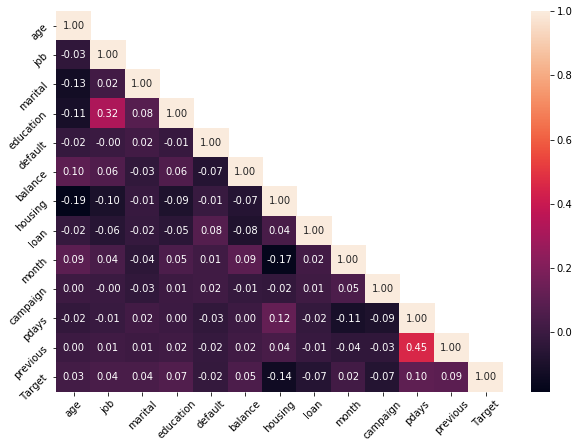

In [120]:
#Design a correlation heat map to understand the correlation within the independent variables.
#This will help us to determine any multicolinearity and remove the same from the dataset for building a better model.
df_loanN = df_loan.iloc[:,0:13] # removing the target variable from the correlation analysis.
corr = df_loanN.corr()
plt.figure(figsize=(10,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f') # Plot the headmap and understand the correlation
labelx = a.set_xticklabels(a.get_xticklabels(), rotation=45)
labely = a.set_yticklabels(a.get_yticklabels(), rotation=45)

Observation:  There seems to be minimal correlation between education and job.  Similar correlation is noted between pdays (days passed from previous campaign) and previous (number of contacts before this campaign).  There is no significance and hence no multicollinearity noted.

In [121]:
df_loan.loc[df_loan.previous > 0,'Pre_Contact'] = 1
df_loan.loc[df_loan.previous == 0,'Pre_Contact'] = 0
df_loan = df_loan.drop(['pdays'],axis=1)
df_loan.head()

,age,job,marital,education,default,balance,housing,loan,month,campaign,previous,Target,Pre_Contact
0,58,10,1,3,0,2143,1,0,5,1,0,0,0.0
1,44,1,2,2,0,29,1,0,5,1,0,0,0.0
2,33,5,1,2,0,2,1,1,5,1,0,0,0.0
3,47,4,1,4,0,1506,1,0,5,1,0,0,0.0
4,33,12,2,4,0,1,0,0,5,1,0,0,0.0


Observation and action: Pdays is the number of days passed by after the client was last contacted. 80% of the values are -1.  Further analysis has shown that all pDays with -1 has Previous column value as 0.  This means that this specific customer was never contacted before.  We need the details of whether or not a customer was contacted before and hence these two variable can be combined into one having 0 for not contacted and others for contacted.  

In [0]:
# Use the PairPlot to understand individual variables and its distribution.
sns.pairplot(df_loan)

Observation:  The Pairplot for all the variables does not provide much details as the data is unbalanced and there are no major correlation as we discussed in the correlation heatmap.

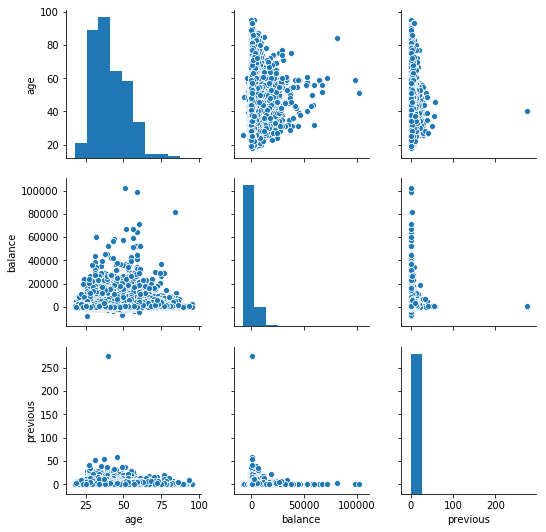

In [78]:
# Use the PairPlot to understand individual variables and its distribution.
sns.pairplot(df_loan[['age','balance','previous']])

Observation:


1.   Age: There is no significant different on bank balance between age groups.  They seem to lie between 0 to 30000.
2. Balance: Bank Balance seems to be spread between 0 and 30000 with outliers.  Atleast 15% of the customers have balance as less than Zero (negative)
3.   Previous: Atleast 80% of the customers were not contacted for the previous campaign.  Their Bank Balance does not show significance as there are customers with bank balance more than 10000 euros and they have not been contacted.



In [0]:
df_loan = df_loan.drop(['previous'],axis=1) #Removing Previous also as it has been merged with pdays as a new column Pre_contact

In [123]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,5.371480,3.367861,1.0,2.0,4.0,9.0,12.0
marital,45211.0,1.513238,0.692948,1.0,1.0,1.0,2.0,3.0
education,45211.0,2.224813,0.747997,1.0,2.0,2.0,3.0,4.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
month,45211.0,6.144655,2.408034,1.0,5.0,6.0,8.0,12.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0


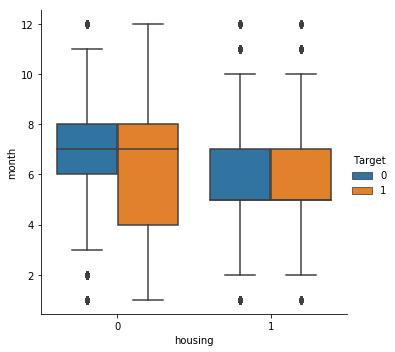

In [124]:
# Using CatPlot to understand the relationship between Housing / Month and the Target variable
sns.catplot(x="housing", 
               y="month",
                hue="Target", 
               data=df_loan, 
              kind="box")

Observation: Those who do not have a housing loan are targetted between the months April and August as part of the campaign. The conversion rate is also high for non-housing loan customers. Housing loan takers have a 50% conversion rate.

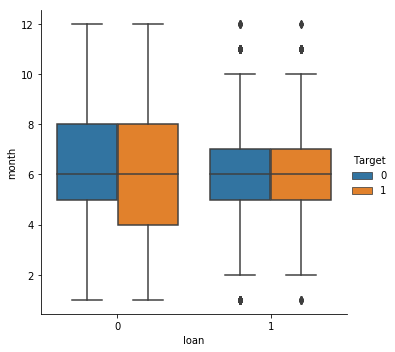

In [125]:
# Using CatPlot to understand the relationship between loan / Month and the Target variable
sns.catplot(x="loan", 
               y="month",
                hue="Target", 
               data=df_loan, 
              kind="box")

Observation: Those who do not have a loan are targetted between the months April and August as part of the campaign. The conversion rate is also high for non-loan customers. Loan takers have a 50% conversion rate.

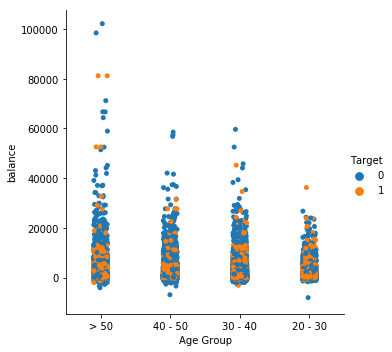

In [126]:
# Using CatPlot to understand the relationship between loan / Month and the Target variable
#df_loan.loc[df_loan.previous > 0] = 1
df_loanC = df_loan.copy()
df_loanC.loc[df_loanC.age <= 30, 'Age Group'] = '20 - 30' 
df_loanC.loc[(df_loanC.age > 30) & (df_loanC.age <= 40), 'Age Group'] = '30 - 40'
df_loanC.loc[(df_loanC.age > 40) & (df_loanC.age <= 50), 'Age Group'] = '40 - 50'
df_loanC.loc[df_loanC.age > 50, 'Age Group'] = '> 50'

sns.catplot(x="Age Group", 
               y="balance",
                hue="Target", 
               data=df_loanC, 
              kind="strip")

Observation:  Customers with balance of 0 to 30000 are spread across all age groups.  Term Deposit takers are also spread across all age groups.

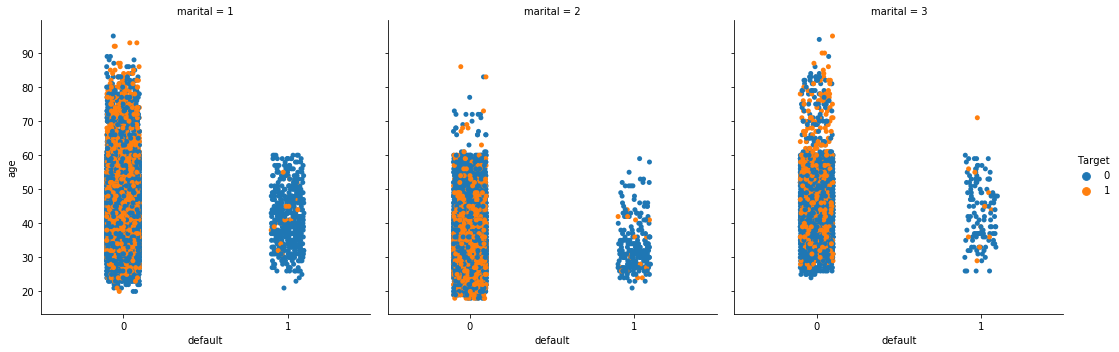

In [127]:
# Using CatPlot to understand the relationship between Age / Education / Marital status and the Target variable
sns.catplot(x="default", 
               y="age", 
               hue="Target",
               col="marital",
               data=df_loan, 
               kind="strip")

Observation: Non Defaulters are more likely to take the term deposit than the defaulters and they are in all age groups.

## Split the data into Training and Testing Split

In [128]:
#Understand the Target Variable spread.
print('Split of Loan decisions:\n',df_loan['Target'].value_counts())


Split of Loan decisions:
 0    39922
1     5289
Name: Target, dtype: int64


Observation:  Target variable is of 75 (0) and 25 (1) split.

In [0]:
# X and y Values and Data Split for Model Training

X = df_loan.drop(['Target'], axis=1) # Copy all except Personal Loan Column to X as Personal Loan is our Target Variable
y = df_loan[['Target']] # Copy the Target Variable to y
ModelLabels = [] # Capture Labels
ModelResults = [] # Capture Results
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.30,random_state=15) # Split the data into Train and Test split

## Logistics Regression

In [130]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predictL = lr.predict(X_test)
print('Logistic Regression Score for Training set =',lr.score(X_train, y_train))
print('Logistic Regression Score for Test set =',lr.score(X_test, y_test))
print(metrics.classification_report(y_test, y_predictL))

# adding result and label to lists
ModelLabels.append("Log_Reg")
ModelResults.append(lr.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Score for Training set = 0.8813789616709324
Logistic Regression Score for Test set = 0.8872751400766735
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12032
           1       0.71      0.00      0.01      1532

    accuracy                           0.89     13564
   macro avg       0.80      0.50      0.47     13564
weighted avg       0.87      0.89      0.83     13564



## Decision Tree

In [131]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_predictD = dt.predict(X_test)
print('Decision Tree Score for Training set =',dt.score(X_train, y_train))
print('Decision Tree Score for Test set =',dt.score(X_test, y_test))
print(metrics.classification_report(y_test, y_predictD))
# adding result and label to lists
ModelLabels.append("Dec_Tree")
ModelResults.append(dt.score(X_test,y_test))

Decision Tree Score for Training set = 0.9998104085695326
Decision Tree Score for Test set = 0.8136242996166323
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     12032
           1       0.23      0.28      0.26      1532

    accuracy                           0.81     13564
   macro avg       0.57      0.58      0.57     13564
weighted avg       0.83      0.81      0.82     13564



## Random Forest

In [132]:
# Random forest
rf = RandomForestClassifier(n_estimators=100,random_state = 1)
rf.fit(X_train, y_train)
y_predictR = rf.predict(X_test)
print('Random Forest Score for Training set =',rf.score(X_train, y_train))
print('Random Forest Score for Test set =',rf.score(X_test, y_test))
print(metrics.classification_report(y_test, y_predictR))
# adding result and label to lists
ModelLabels.append("Rand_For")
ModelResults.append(rf.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Score for Training set = 0.9997472114260435
Random Forest Score for Test set = 0.8839575346505456
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12032
           1       0.46      0.15      0.22      1532

    accuracy                           0.88     13564
   macro avg       0.68      0.56      0.58     13564
weighted avg       0.85      0.88      0.86     13564



## Naive Bayes

In [133]:
# Naive Bayes 
nb = GaussianNB()
nb.fit(X_train,y_train)
y_predictN = nb.predict(X_test)
print('Naive Bayes Score for Training set =',nb.score(X_train, y_train))
print('Naive Bayes Score for Test set =',nb.score(X_test, y_test))
print(metrics.classification_report(y_test, y_predictN))
# adding result and label to lists
ModelLabels.append("Naive_Bayes")
ModelResults.append(nb.score(X_test,y_test))

Naive Bayes Score for Training set = 0.8479792713369356
Naive Bayes Score for Test set = 0.8487909171335889
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     12032
           1       0.31      0.28      0.30      1532

    accuracy                           0.85     13564
   macro avg       0.61      0.60      0.61     13564
weighted avg       0.84      0.85      0.85     13564



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Support Vector Machines (SVM)

In [134]:
# SVM model
svm = SVC(random_state=3)
svm.fit(X_train,y_train)
y_predictS = svm.predict(X_test)
print('Support Vector Machines (SVM) Score for Training set =',svm.score(X_train, y_train))
print('Support Vector Machines (SVM) Score for Test set =',svm.score(X_test, y_test))
print(metrics.classification_report(y_test, y_predictS))
# adding result and label to lists
ModelLabels.append("SVM")
ModelResults.append(svm.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Machines (SVM) Score for Training set = 0.9527601352418871
Support Vector Machines (SVM) Score for Test set = 0.8866116189914479
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12032
           1       0.45      0.02      0.03      1532

    accuracy                           0.89     13564
   macro avg       0.67      0.51      0.49     13564
weighted avg       0.84      0.89      0.84     13564



## KNN

### Determine the optimum K value and plot it

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


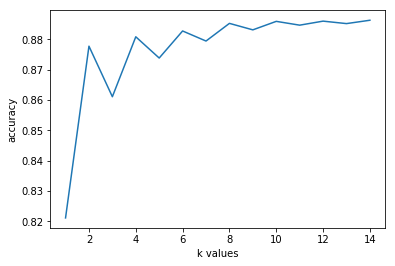

In [135]:
# Finding optimum k value between 1 and 15
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each) # create a new knn model
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))

plt.plot(range(1,15),score_list) # x axis is in interval of 1 and 15
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

### Run the model for optimum K value and get the prediction.

In [136]:
# finding max value in a list and it's index.
a = max(score_list) # finding max value in list
b = score_list.index(a)+1 # index of max value.
print("k = ",b," and maximum value is ", a)


# KNN model
knn = KNeighborsClassifier(n_neighbors=b) #n_neighbors = k
knn.fit(X_train,y_train)
y_predictK = knn.predict(X_test)

# score
print(" KNN Score with {} nn for Training set: {} ".format(b,knn.score(X_train,y_train)))
print(" KNN Score with {} nn for Test set: {} ".format(b,knn.score(X_test,y_test)))
print(metrics.classification_report(y_test, y_predictK))

# adding result and label to lists
ModelLabels.append("KNN")
ModelResults.append(a)

k =  14  and maximum value is  0.8863167207313477


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


 KNN Score with 14 nn for Training set: 0.8819161373905899 
 KNN Score with 14 nn for Test set: 0.8863167207313477 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12032
           1       0.22      0.00      0.01      1532

    accuracy                           0.89     13564
   macro avg       0.55      0.50      0.47     13564
weighted avg       0.81      0.89      0.83     13564



## Results of the Classification models listed below

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

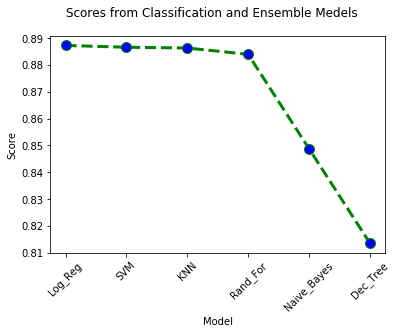

In [137]:
Class_models = pd.DataFrame(
    {'Model Name': ModelLabels,
     'Model Results': ModelResults,
    })
new_index = (Class_models['Model Results'].sort_values(ascending=False)).index.values 
Class_models = Class_models.reindex(new_index)
fig = plt.figure()
fig.suptitle('Scores from Classification and Ensemble Medels')
plt.xlabel('Model')
plt.ylabel('Score')
plt.plot(Class_models.loc[:,"Model Name"],Class_models.loc[:,"Model Results"],color='green', linestyle='dashed', linewidth = 3, 
        marker='o', markerfacecolor='blue', markersize=10)
plt.xticks(rotation=45)

Observation:  Logistic Regression seems to fair better than all the other models.

## Ensemble Techniques - ADABoost

In [138]:
# Ensemble Technique - AdaBoost
from sklearn.ensemble import AdaBoostClassifier
abc1 = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abc1 = abc1.fit(X_train, y_train)
y_predictAB = abc1.predict(X_test)
print('Ensemble AdaBoost Score for Training set =',abc1.score(X_train, y_train))
print('Ensemble AdaBoost Score for Test set =',abc1.score(X_test, y_test))
print(metrics.classification_report(y_test, y_predictAB))
# adding result and label to lists
ModelLabels.append("En-AdaB")
ModelResults.append(abc1.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ensemble AdaBoost Score for Training set = 0.8812841659556988
Ensemble AdaBoost Score for Test set = 0.8872751400766735
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12032
           1       0.56      0.01      0.02      1532

    accuracy                           0.89     13564
   macro avg       0.72      0.50      0.48     13564
weighted avg       0.85      0.89      0.84     13564



## Ensemble Technique - Bagging Classifier

In [139]:
# Ensemble Technique - Bagging Clasifier
from sklearn.ensemble import BaggingClassifier

bgc1 = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgc1 = bgc1.fit(X_train, y_train)

y_predictBG = bgc1.predict(X_test)
print('Ensemble Bagging Score for Training set =',bgc1.score(X_train, y_train))
print('Ensemble Bagging Score for Test set =',bgc1.score(X_test, y_test))
print(metrics.classification_report(y_test, y_predictBG))
# adding result and label to lists
ModelLabels.append("En-Bg")
ModelResults.append(bgc1.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ensemble Bagging Score for Training set = 0.9811356526684993
Ensemble Bagging Score for Test set = 0.8816720731347685
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     12032
           1       0.44      0.17      0.25      1532

    accuracy                           0.88     13564
   macro avg       0.67      0.57      0.59     13564
weighted avg       0.85      0.88      0.86     13564



## Ensemble Technique - Gradient Boost

In [140]:
# Ensemble Technique - Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
gbc1 = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbc1 = gbc1.fit(X_train, y_train)

y_predictGB = gbc1.predict(X_test)
print('Ensemble Gradient Boost Score for Training set =',gbc1.score(X_train, y_train))
print('Ensemble Gradient Boost Score for Test set =',gbc1.score(X_test, y_test))
print(metrics.classification_report(y_test, y_predictGB))
# adding result and label to lists
ModelLabels.append("En-GB")
ModelResults.append(gbc1.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ensemble Gradient Boost Score for Training set = 0.8853287831390021
Ensemble Gradient Boost Score for Test set = 0.8871276909466234
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     12032
           1       0.50      0.08      0.14      1532

    accuracy                           0.89     13564
   macro avg       0.70      0.54      0.54     13564
weighted avg       0.85      0.89      0.85     13564



## Plot All the Models

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

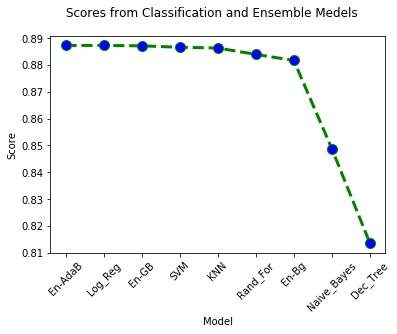

In [141]:
All_models = pd.DataFrame(
    {'Model Name': ModelLabels,
     'Model Results': ModelResults,
    })
new_index = (All_models['Model Results'].sort_values(ascending=False)).index.values 
All_models = All_models.reindex(new_index)
fig = plt.figure()
fig.suptitle('Scores from Classification and Ensemble Medels')
plt.xlabel('Model')
plt.ylabel('Score')
plt.plot(All_models.loc[:,"Model Name"],All_models.loc[:,"Model Results"],color='green', linestyle='dashed', linewidth = 3, 
        marker='o', markerfacecolor='blue', markersize=10)
plt.xticks(rotation=45)